In [1]:
import numpy as np
import pandas as pd
import eda as ed
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
titanic = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
ID = test.PassengerId

In [5]:
titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


Here we have 14 columns including the response variable.

So we have 3 categorical and 2 boolean columns. Let's move on with changing boolean columns into 0s and 1s.

In [8]:
# Changing True-False values into 0s and 1s
titanic.VIP = titanic.VIP.astype(np.number)
titanic.CryoSleep = titanic.CryoSleep.astype(np.number)
titanic.Transported = titanic.Transported.astype(np.number)
test.VIP = test.VIP.astype(np.number)
test.CryoSleep = test.CryoSleep.astype(np.number)

Next thing we may do is to seperate name column into name and surname

In [9]:
titanic.Name = titanic.Name.str.split(" ")
test.Name = test.Name.str.split(" ")

In [10]:
surname = []
name = []
for i in titanic.Name:
    try:
        surname.append(i[1])
        name.append(i[0])
    except:
        surname.append(np.nan)
        name.append(np.nan)
titanic["Surname"] = surname
titanic["Name"] = name

In [11]:
surname = []
name = []
for i in test.Name:
    try:
        surname.append(i[1])
        name.append(i[0])
    except:
        surname.append(np.nan)
        name.append(np.nan)
test["Surname"] = surname
test["Name"] = name

In [12]:
titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Surname
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham,0.0,Ofracculy
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna,1.0,Vines
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark,0.0,Susent
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam,0.0,Susent
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy,1.0,Santantines


In [13]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Surname
0,0013_01,Earth,1.0,G/3/S,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly,Carsoning
1,0018_01,Earth,0.0,F/4/S,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome,Peckers
2,0019_01,Europa,1.0,C/0/S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih,Unhearfus
3,0021_01,Europa,0.0,C/1/S,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz,Caltilter
4,0023_01,Earth,0.0,F/5/S,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence,Harperez


Next, we seperate Cabin column into deck, num, side.

In [14]:
titanic.Cabin = titanic.Cabin.str.split("/")
titanic.PassengerId = titanic.PassengerId.str.split("_")
test.Cabin = test.Cabin.str.split("/")
test.PassengerId = test.PassengerId.str.split("_")

In [15]:
group_no = []
deck = []
num = []
side = []
for i in titanic.Cabin:
    try:
        deck.append(i[0])
        num.append(i[1])
        side.append(i[2])
    except:
        deck.append(np.nan)
        num.append(np.nan)
        side.append(np.nan)
for i in titanic.PassengerId:
    try:
        group_no.append(i[1])
    except:
        group_no.append(np.nan)
titanic["Deck"] = deck
titanic["Num"] = num
titanic["Side"] = side
titanic["Group"] = group_no
titanic.drop("PassengerId", axis = 1, inplace=True)
titanic.drop("Cabin", axis = 1, inplace=True)

In [16]:
group_no = []
deck = []
num = []
side = []
for i in test.Cabin:
    try:
        deck.append(i[0])
        num.append(i[1])
        side.append(i[2])
    except:
        deck.append(np.nan)
        num.append(np.nan)
        side.append(np.nan)
for i in test.PassengerId:
    try:
        group_no.append(i[1])
    except:
        group_no.append(np.nan)
test["Deck"] = deck
test["Num"] = num
test["Side"] = side
test["Group"] = group_no
test.drop("PassengerId", axis = 1, inplace=True)
test.drop("Cabin", axis = 1, inplace=True)

In [17]:
titanic.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Surname,Deck,Num,Side,Group
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham,0.0,Ofracculy,B,0,P,01
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna,1.0,Vines,F,0,S,01
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark,0.0,Susent,A,0,S,01
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam,0.0,Susent,A,0,S,02
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy,1.0,Santantines,F,1,S,01


In [18]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Surname,Deck,Num,Side,Group
0,Earth,1.0,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly,Carsoning,G,3,S,01
1,Earth,0.0,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome,Peckers,F,4,S,01
2,Europa,1.0,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih,Unhearfus,C,0,S,01
3,Europa,0.0,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz,Caltilter,C,1,S,01
4,Earth,0.0,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence,Harperez,F,5,S,01


In [19]:
ed.unistats(titanic)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Transported,8693,0,2,float64,1.0,0.503624,0.0,0.0,1.0,1.0,1.0,0.500016,-0.014497,-2.00025
Age,8514,179,80,float64,24.0,28.82793,0.0,19.0,27.0,38.0,79.0,14.489021,0.419097,0.101933
RoomService,8512,181,1273,float64,0.0,224.687617,0.0,0.0,0.0,47.0,14327.0,666.717663,6.333014,65.273802
FoodCourt,8510,183,1507,float64,0.0,458.077203,0.0,0.0,0.0,76.0,29813.0,1611.48924,7.102228,73.30723
Spa,8510,183,1327,float64,0.0,311.138778,0.0,0.0,0.0,59.0,22408.0,1136.705535,7.63602,81.20211
VRDeck,8505,188,1306,float64,0.0,304.854791,0.0,0.0,0.0,46.0,24133.0,1145.717189,7.819732,86.011186
VIP,8490,203,2,float64,0.0,0.023439,0.0,0.0,0.0,0.0,1.0,0.151303,6.3009,37.71023
ShoppingMall,8485,208,1115,float64,0.0,173.729169,0.0,0.0,0.0,27.0,23492.0,604.696458,12.627562,328.870913
CryoSleep,8476,217,2,float64,0.0,0.358306,0.0,0.0,0.0,1.0,1.0,0.479531,0.59111,-1.650979
Group,8693,0,8,object,-,-,-,-,-,-,-,-,-,-


In [20]:
ed.unistats(test)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
VRDeck,4197,80,796,float64,0.0,310.710031,0.0,0.0,0.0,36.0,22272.0,1246.994742,8.38721,93.842398
RoomService,4195,82,842,float64,0.0,219.266269,0.0,0.0,0.0,53.0,11567.0,607.011289,5.55839,53.216268
Age,4186,91,79,float64,18.0,28.658146,0.0,19.0,26.0,37.0,79.0,14.179072,0.4848,0.218523
CryoSleep,4184,93,2,float64,0.0,0.369025,0.0,0.0,0.0,1.0,1.0,0.482598,0.543051,-1.705911
VIP,4184,93,2,float64,0.0,0.017686,0.0,0.0,0.0,0.0,1.0,0.131825,7.320995,51.621648
ShoppingMall,4179,98,715,float64,0.0,177.295525,0.0,0.0,0.0,33.0,8292.0,560.821123,6.824939,68.221142
Spa,4176,101,833,float64,0.0,303.052443,0.0,0.0,0.0,50.0,19844.0,1117.186015,7.690298,80.460402
FoodCourt,4171,106,902,float64,0.0,439.484296,0.0,0.0,0.0,78.0,25273.0,1527.663045,6.910625,67.764434
Group,4277,0,8,object,-,-,-,-,-,-,-,-,-,-
HomePlanet,4190,87,3,object,-,-,-,-,-,-,-,-,-,-


After some preprocessing, we have 6 categorical columns: ***HomePlanet, Side, Deck, Destination, CryoSleep, VIP***

And 6 numerical columns: ***Age, RoomService, FoodCourt, Spa, VRDeck, ShoppingMall***

And ready to investigate: ***Num, Name, Surname***

Lastly the response variable is boolean: ***Transported***

Also we have nearly 200 missing values in each column in the train data and 100 in the test data.

## EDA

### Transported

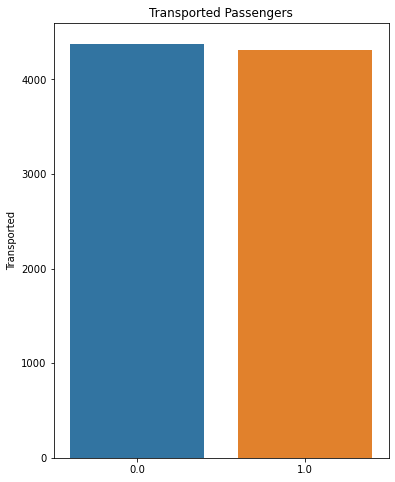

In [21]:
plt.figure(figsize = (6,8))
plt.title("Transported Passengers")
sns.barplot(x = titanic.Transported.unique(),y=titanic.Transported.value_counts(), data=titanic);

Here we observe that almost same amoun of people either transported or not. So worst case, the model is tossing a coin to decide.

### VIP

In [22]:
#We have 203 null values in the VIP column
titanic[titanic.VIP.isnull()]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Surname,Deck,Num,Side,Group
38,Earth,0.0,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,Marina,0.0,Leodger,F,8,S,01
102,Earth,0.0,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline,1.0,Handertiz,G,19,S,03
145,Mars,1.0,TRAPPIST-1e,35.0,NaN,0.0,0.0,0.0,0.0,0.0,Graven,1.0,Anche,F,37,P,01
228,Mars,1.0,55 Cancri e,14.0,NaN,0.0,0.0,0.0,0.0,0.0,Tous,1.0,Sad,F,47,S,02
566,Mars,0.0,TRAPPIST-1e,NaN,NaN,43.0,152.0,182.0,1.0,2005.0,Hon,0.0,Kra,D,24,P,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,Earth,1.0,TRAPPIST-1e,0.0,NaN,0.0,0.0,NaN,0.0,0.0,Adamie,1.0,Trerady,G,1460,S,01
8512,Earth,0.0,PSO J318.5-22,16.0,NaN,0.0,0.0,761.0,0.0,0.0,Daryla,0.0,Clemondsey,F,1858,P,06
8542,Earth,1.0,55 Cancri e,55.0,NaN,0.0,0.0,0.0,0.0,0.0,Paulas,0.0,Schmondez,G,1469,S,01
8630,Europa,1.0,TRAPPIST-1e,52.0,NaN,0.0,0.0,0.0,0.0,0.0,Propent,1.0,Brakeng,B,300,P,03


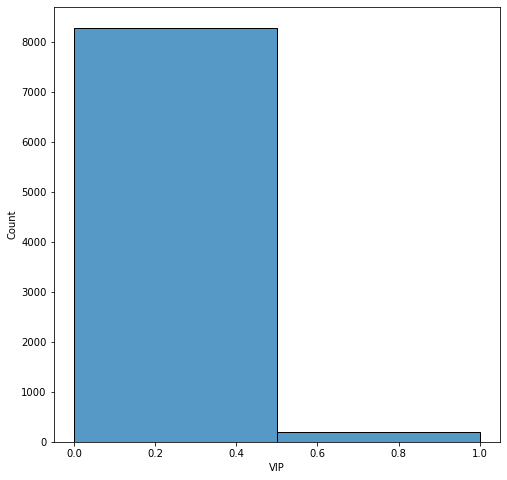

In [23]:
plt.figure(figsize = (8,8))
sns.histplot(titanic.VIP, bins=2);

<AxesSubplot:xlabel='VIP', ylabel='Age'>

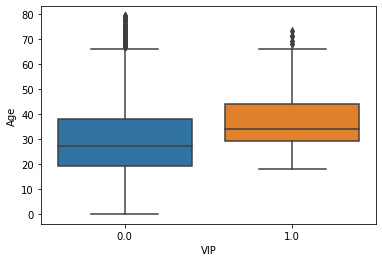

In [24]:
sns.boxplot(x = "VIP", y = "Age", data = titanic)

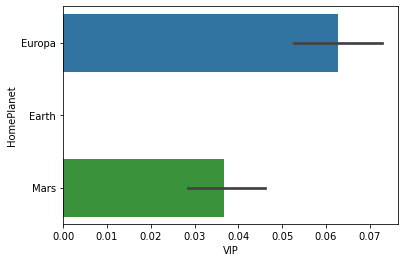

In [25]:
sns.barplot(x = "VIP", y="HomePlanet", data =titanic);

In [26]:
titanic[titanic.VIP == 1].sort_values(by="Age")

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Surname,Deck,Num,Side,Group
3283,Mars,0.0,TRAPPIST-1e,18.0,1.0,733.0,0.0,688.0,1.0,0.0,Cindee,0.0,Terte,F,729,P,01
5845,Mars,0.0,TRAPPIST-1e,19.0,1.0,61.0,783.0,110.0,0.0,0.0,Tot,1.0,Ancy,E,396,P,01
4268,Mars,0.0,PSO J318.5-22,20.0,1.0,14.0,0.0,59.0,1777.0,0.0,Quakes,0.0,Winie,F,936,P,01
7568,Mars,0.0,TRAPPIST-1e,23.0,1.0,3.0,0.0,0.0,1677.0,NaN,Varkes,0.0,Kart,F,1670,P,02
8018,Europa,1.0,TRAPPIST-1e,25.0,1.0,0.0,0.0,0.0,0.0,0.0,Kitauva,1.0,Fawnsive,C,323,S,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7576,Europa,0.0,TRAPPIST-1e,69.0,1.0,0.0,269.0,0.0,190.0,9033.0,Ariton,0.0,Mosteraked,B,269,P,01
779,Europa,0.0,TRAPPIST-1e,71.0,1.0,0.0,0.0,0.0,0.0,0.0,Ksorab,1.0,Couseced,B,29,S,01
2694,Mars,0.0,TRAPPIST-1e,71.0,1.0,901.0,0.0,1698.0,0.0,0.0,Kad,0.0,Gele,F,597,P,01
3104,Europa,1.0,TRAPPIST-1e,73.0,1.0,0.0,0.0,0.0,NaN,0.0,Sargin,1.0,Brakeril,C,111,P,01


We have no VIP from Earth and less than 18 years old, we can use this inference to fill some missing data.

In [27]:
print(f"Missing VIP data in training before = {titanic.VIP.isnull().sum()} ")
print(f"Missing VIP data in test before = {test.VIP.isnull().sum()} ")

Missing VIP data in training before = 203 
Missing VIP data in test before = 93 


In [28]:
idx = titanic[titanic.Age < 18].index
idx2 = titanic[titanic.HomePlanet == "Earth"].index
titanic.VIP[idx] = 0
titanic.VIP[idx2] = 0

idx = test[test.Age < 18].index
idx2 = test[test.HomePlanet == "Earth"].index
test.VIP[idx] = 0
test.VIP[idx2] = 0

In [29]:
print(f"Missing VIP data in training after = {titanic.VIP.isnull().sum()} ")
print(f"Missing VIP data in test after = {test.VIP.isnull().sum()} ")

Missing VIP data in training after = 76 
Missing VIP data in test after = 49 


We really did a good job in terms of missing data.

## HomePlanet

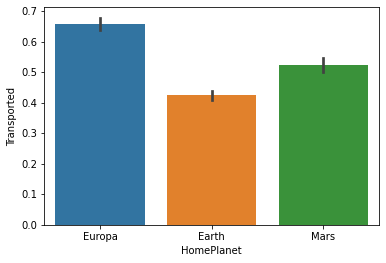

In [30]:
sns.barplot(x = "HomePlanet", y="Transported", data = titanic);

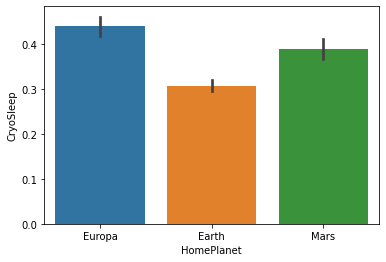

In [31]:
sns.barplot(x = "HomePlanet", y = "CryoSleep",data = titanic);

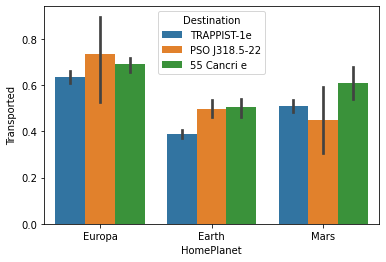

In [32]:
sns.barplot(x = "HomePlanet", y = "Transported", hue = "Destination",data = titanic);

<AxesSubplot:xlabel='HomePlanet', ylabel='RoomService'>

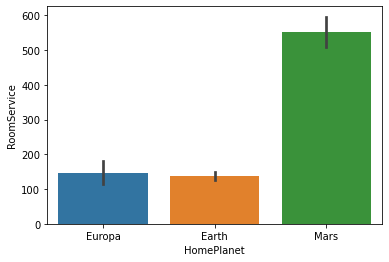

In [33]:
sns.barplot(x = "HomePlanet", y="RoomService", data = titanic)

<AxesSubplot:xlabel='HomePlanet', ylabel='FoodCourt'>

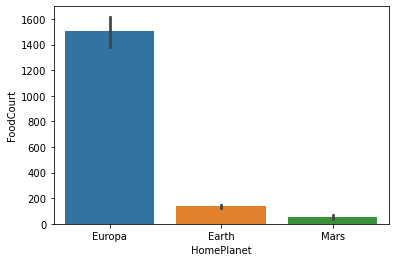

In [34]:
sns.barplot(x = "HomePlanet", y="FoodCourt", data = titanic)

<AxesSubplot:xlabel='HomePlanet', ylabel='VRDeck'>

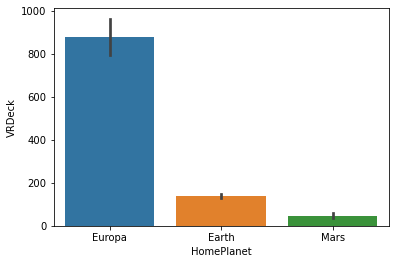

In [35]:
sns.barplot(x = "HomePlanet", y="VRDeck", data = titanic)

<AxesSubplot:xlabel='HomePlanet', ylabel='Spa'>

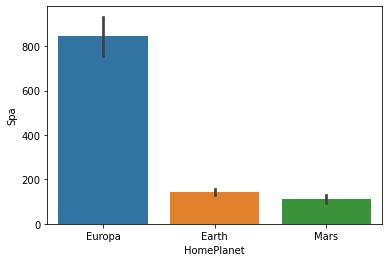

In [36]:
sns.barplot(x = "HomePlanet", y="Spa", data = titanic)

So we can see that spendings are relatively differs from home to home. Lets create a column with total spending in order to see total effect.

In [37]:
titanic["TotalSpending"] = titanic["Spa"] + titanic["VRDeck"] + titanic["ShoppingMall"] + titanic["FoodCourt"] + titanic["RoomService"]

In [38]:
test["TotalSpending"] = test["Spa"] + test["VRDeck"] + test["ShoppingMall"] + test["FoodCourt"] + test["RoomService"]

<AxesSubplot:xlabel='HomePlanet', ylabel='TotalSpending'>

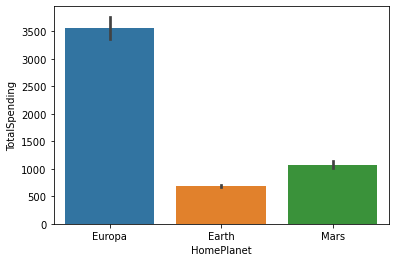

In [39]:
sns.barplot(x = "HomePlanet", y="TotalSpending", data=titanic)

We observe that most spending come from Europa

### CryoSleep

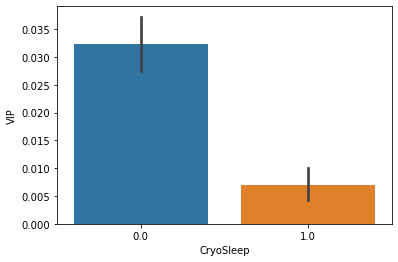

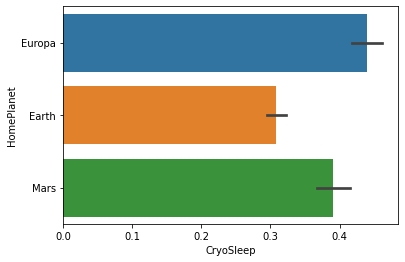

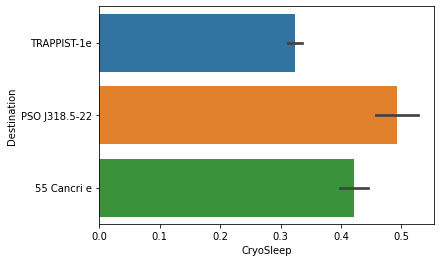

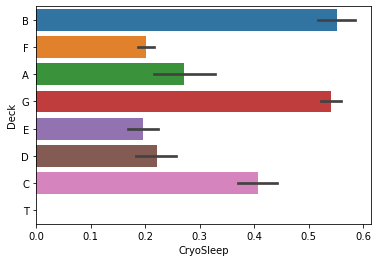

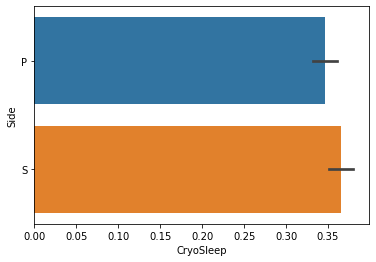

In [40]:
for i in ["VIP","HomePlanet","Destination","Deck","Side"]:
    plt.subplots()
    sns.barplot(x = "CryoSleep", y = i, data =  titanic)

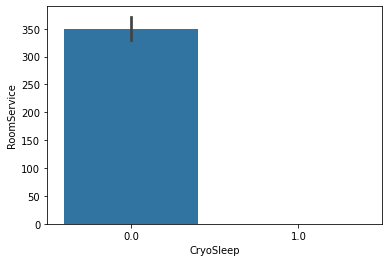

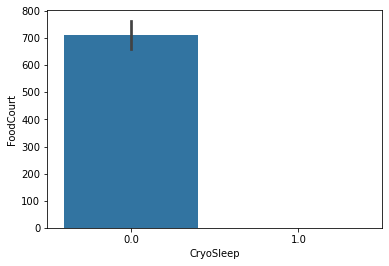

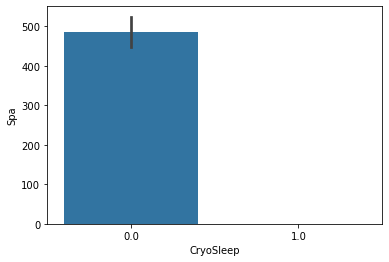

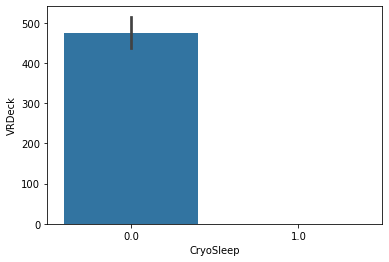

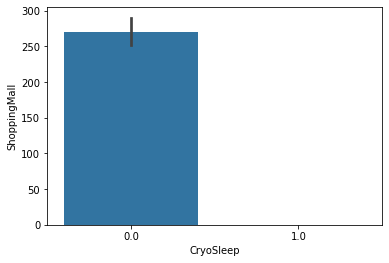

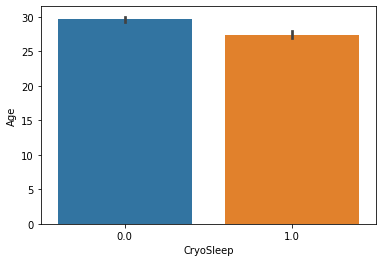

In [41]:
for i in ["RoomService","FoodCourt","Spa","VRDeck","ShoppingMall","Age"]:
    plt.subplots()
    sns.barplot(x = "CryoSleep", y = i,data = titanic)

Observe that if a passenger asleep, no spending made. So we can fill the missing values in the spending columns to 0 if passenger is asleep.

In [42]:
print(f"Missing CryoSleep data in training before = {titanic.CryoSleep.isnull().sum()} ")
print(f"Missing Room Service data in training before = {titanic.RoomService.isnull().sum()} ")
print(f"Missing Food Court data in training before = {titanic.FoodCourt.isnull().sum()} ")
print(f"Missing Spa data in training before = {titanic.Spa.isnull().sum()} ")
print(f"Missing VRDeck data in training before = {titanic.VRDeck.isnull().sum()} ")
print(f"Missing Shopping Mall data in training before = {titanic.ShoppingMall.isnull().sum()} \n ")


print(f"Missing CryoSleep data in test before = {test.CryoSleep.isnull().sum()} ")
print(f"Missing Room Service data in test before = {test.RoomService.isnull().sum()} ")
print(f"Missing Food Court data in test before = {test.FoodCourt.isnull().sum()} ")
print(f"Missing Spa data in test before = {test.Spa.isnull().sum()} ")
print(f"Missing VRDeck data in test before = {test.VRDeck.isnull().sum()} ")
print(f"Missing Shopping Mall data in test before = {test.ShoppingMall.isnull().sum()} ")

Missing CryoSleep data in training before = 217 
Missing Room Service data in training before = 181 
Missing Food Court data in training before = 183 
Missing Spa data in training before = 183 
Missing VRDeck data in training before = 188 
Missing Shopping Mall data in training before = 208 
 
Missing CryoSleep data in test before = 93 
Missing Room Service data in test before = 82 
Missing Food Court data in test before = 106 
Missing Spa data in test before = 101 
Missing VRDeck data in test before = 80 
Missing Shopping Mall data in test before = 98 


In [43]:
#If somebody is asleep, no purchase occured as well as if any purchase occured than passenger is not asleep
idx = titanic[titanic.CryoSleep == 1].index
titanic["RoomService"][idx] = 0
titanic["Spa"][idx] = 0
titanic["ShoppingMall"][idx] = 0
titanic["FoodCourt"][idx] = 0
titanic["VRDeck"][idx] = 0

for i in titanic[( titanic.ShoppingMall) > 0].index:
    titanic["CryoSleep"][i] = 0
for i in titanic[( titanic.Spa) > 0].index:
    titanic["CryoSleep"][i] = 0
for i in titanic[( titanic.FoodCourt) > 0].index:
    titanic["CryoSleep"][i] = 0
for i in titanic[( titanic.VRDeck) > 0].index:
    titanic["CryoSleep"][i] = 0
for i in titanic[( titanic.RoomService) > 0].index:
    titanic["CryoSleep"][i] = 0

idx = test[test.CryoSleep == 1].index
test["RoomService"][idx] = 0
test["Spa"][idx] = 0
test["ShoppingMall"][idx] = 0
test["FoodCourt"][idx] = 0
test["VRDeck"][idx] = 0

for i in test[( test.ShoppingMall) > 0].index:
    test["CryoSleep"][i] = 0
for i in test[( test.Spa) > 0].index:
    test["CryoSleep"][i] = 0
for i in test[( test.FoodCourt) > 0].index:
    test["CryoSleep"][i] = 0
for i in test[( test.VRDeck) > 0].index:
    test["CryoSleep"][i] = 0
for i in test[( test.RoomService) > 0].index:
    test["CryoSleep"][i] = 0

In [44]:
print(f"Missing CryoSleep data in training after = {titanic.CryoSleep.isnull().sum()} ")
print(f"Missing Room Service data in training after = {titanic.RoomService.isnull().sum()} ")
print(f"Missing Food Court data in training after = {titanic.FoodCourt.isnull().sum()} ")
print(f"Missing Spa data in training after = {titanic.Spa.isnull().sum()} ")
print(f"Missing VRDeck data in training after = {titanic.VRDeck.isnull().sum()} ")
print(f"Missing Shopping Mall data in training after = {titanic.ShoppingMall.isnull().sum()} \n ")


print(f"Missing CryoSleep data in test after = {test.CryoSleep.isnull().sum()} ")
print(f"Missing Room Service data in test after = {test.RoomService.isnull().sum()} ")
print(f"Missing Food Court data in test after = {test.FoodCourt.isnull().sum()} ")
print(f"Missing Spa data in test after = {test.Spa.isnull().sum()} ")
print(f"Missing VRDeck data in test after = {test.VRDeck.isnull().sum()} ")
print(f"Missing Shopping Mall data in test after = {test.ShoppingMall.isnull().sum()} ")

Missing CryoSleep data in training after = 98 
Missing Room Service data in training after = 113 
Missing Food Court data in training after = 113 
Missing Spa data in training after = 118 
Missing VRDeck data in training after = 126 
Missing Shopping Mall data in training after = 112 
 
Missing CryoSleep data in test after = 38 
Missing Room Service data in test after = 57 
Missing Food Court data in test after = 67 
Missing Spa data in test after = 59 
Missing VRDeck data in test after = 51 
Missing Shopping Mall data in test after = 63 


Another good progress on both training and test data near 50%

###  Group

In [45]:
titanic.Group.value_counts()

01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: Group, dtype: int64

<AxesSubplot:xlabel='Group', ylabel='Transported'>

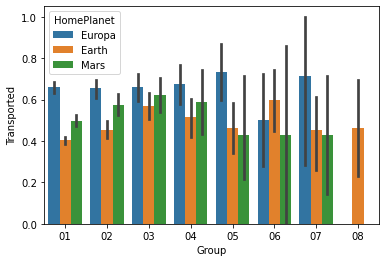

In [46]:
sns.barplot(x = "Group", y= "Transported", hue= "HomePlanet", data = titanic)

Observed that all the people in group 8 are from Earth.

In [47]:
titanic[titanic.Group=="08"]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Surname,Deck,Num,Side,Group,TotalSpending
917,Earth,1.0,TRAPPIST-1e,71.0,0.0,0.0,0.0,0.0,0.0,0.0,Alancy,1.0,Flemaney,G,150,S,08,0.0
3743,Earth,1.0,TRAPPIST-1e,8.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,G,657,P,08,0.0
3995,Earth,0.0,55 Cancri e,44.0,0.0,0.0,0.0,608.0,0.0,91.0,Gerte,0.0,Garnes,F,880,P,08,699.0
4228,Earth,0.0,TRAPPIST-1e,7.0,0.0,0.0,0.0,0.0,0.0,0.0,Kendy,0.0,Munozanson,G,734,S,08,0.0
4815,Earth,0.0,TRAPPIST-1e,35.0,0.0,0.0,116.0,51.0,0.0,701.0,Lawren,0.0,Josey,F,1046,P,08,868.0
5392,Earth,0.0,PSO J318.5-22,31.0,0.0,11.0,0.0,0.0,1912.0,1120.0,Wenise,0.0,Briggston,F,1194,P,08,3043.0
5520,Earth,0.0,TRAPPIST-1e,25.0,0.0,0.0,0.0,892.0,0.0,0.0,Fayene,1.0,Oneiles,G,954,S,08,892.0
7660,Earth,1.0,TRAPPIST-1e,38.0,0.0,0.0,0.0,0.0,0.0,0.0,Ryanne,1.0,Boyers,G,1316,S,08,0.0
8169,Earth,0.0,TRAPPIST-1e,62.0,0.0,0.0,592.0,164.0,0.0,0.0,Franda,1.0,Fulloydez,G,1416,P,08,756.0
8235,Earth,1.0,55 Cancri e,3.0,0.0,0.0,0.0,0.0,0.0,0.0,Dondy,1.0,Traverdy,G,1418,S,08,0.0


In [48]:
test[test.Group=="08"]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Surname,Deck,Num,Side,Group,TotalSpending
160,Earth,0.0,TRAPPIST-1e,36.0,0.0,0.0,69.0,0.0,0.0,796.0,Shalle,Barnolderg,F,75,P,08,865.0
505,Earth,1.0,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Harvin,Arneras,G,160,P,08,0.0
2881,Earth,0.0,TRAPPIST-1e,52.0,0.0,0.0,289.0,0.0,0.0,682.0,Kene,Casez,F,1310,P,08,971.0
2958,Earth,1.0,PSO J318.5-22,6.0,0.0,0.0,0.0,0.0,0.0,0.0,Eleah,Barnolderg,G,1052,P,08,0.0
3197,Earth,1.0,TRAPPIST-1e,6.0,0.0,0.0,0.0,0.0,0.0,0.0,Clard,Vantonson,G,1129,P,08,0.0
3924,Earth,0.0,TRAPPIST-1e,40.0,0.0,256.0,169.0,0.0,0.0,794.0,Rankie,Juartis,F,1646,S,08,1219.0


In [49]:
titanic.Surname.value_counts()

Casonston     18
Oneiles       16
Domington     15
Litthews      15
Browlerson    14
              ..
Covale         1
Dun            1
Witalnerod     1
Deryplinet     1
Sionerorly     1
Name: Surname, Length: 2217, dtype: int64

All the group 8 already in the Earth.

In [50]:
titanic["Family"] = np.nan
test["Family"] = np.nan
family = []
for i in titanic.Surname:
    try:
        if titanic.Surname.value_counts()[i] >= 2:
            family.append(i)
    except:
        pass
family = np.unique(family)
for idx,i in enumerate(titanic.Surname):
    if i in family:
        titanic["Family"][idx] = 1
    else:
        titanic["Family"][idx] = 0
    
family = []
for i in test.Surname:
    try:
        if test.Surname.value_counts()[i] >= 2:
            family.append(i)
    except:
        pass
family = np.unique(family)


for idx,i in enumerate(test.Surname):
    if i in family:
        test["Family"][idx] = 1
    else:
        test["Family"][idx] = 0


In [51]:
test[test.Family== 0]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Surname,Deck,Num,Side,Group,TotalSpending,Family
1,Earth,0.0,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome,Peckers,F,4,S,01,2832.0,0.0
2,Europa,1.0,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih,Unhearfus,C,0,S,01,0.0,0.0
3,Europa,0.0,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz,Caltilter,C,1,S,01,7418.0,0.0
6,Europa,1.0,55 Cancri e,21.0,0.0,0.0,0.0,0.0,0.0,0.0,Aldah,Ainserfle,B,2,P,01,NaN,0.0
13,Mars,1.0,TRAPPIST-1e,46.0,0.0,0.0,0.0,0.0,0.0,0.0,Hamus,Frité,E,0,P,01,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,Europa,0.0,TRAPPIST-1e,32.0,0.0,523.0,2.0,0.0,16.0,14834.0,Alatrix,Mirinanty,C,341,S,01,15375.0,0.0
4246,Europa,1.0,TRAPPIST-1e,42.0,0.0,0.0,0.0,0.0,0.0,0.0,Dubheat,Supriouse,A,96,P,01,0.0,0.0
4252,Earth,0.0,TRAPPIST-1e,41.0,0.0,652.0,0.0,112.0,10.0,0.0,Berly,Roses,G,1499,P,01,774.0,0.0
4262,Europa,0.0,TRAPPIST-1e,35.0,0.0,0.0,4813.0,0.0,142.0,523.0,Sollum,Pumpeshaft,E,596,P,01,5478.0,0.0


So we have more familyless people in the test set.

<AxesSubplot:xlabel='Family', ylabel='Transported'>

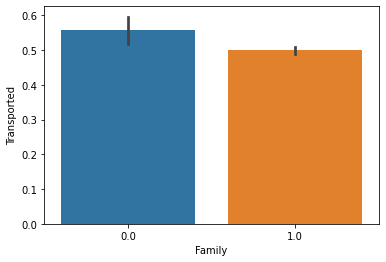

In [52]:
sns.barplot(x = "Family", y = "Transported", data=titanic)

<AxesSubplot:xlabel='Family', ylabel='Group'>

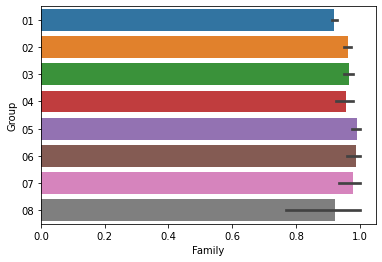

In [53]:
sns.barplot(x = "Family", y = "Group", data = titanic)

Not much came through.

### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

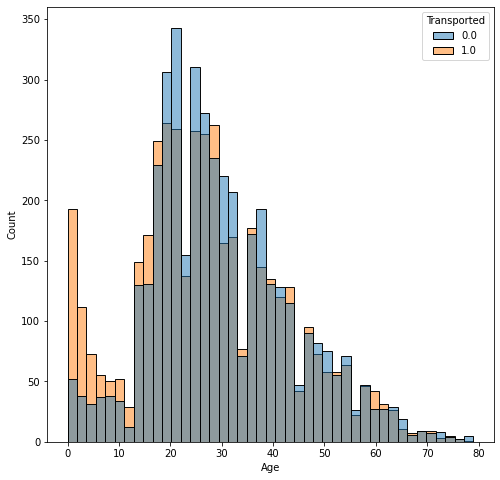

In [54]:
plt.figure(figsize=(8,8))
sns.histplot(x = "Age", hue = "Transported",data = titanic)

Here we observe that young passengers are more frequently transported. So we may create a new feature as young or not.

In [55]:
titanic["Young"] = [ 1 if i < 18 else 0 for i in titanic.Age ]
test["Young"] = [ 1 if i < 18 else 0 for i in test.Age ]

### Destination

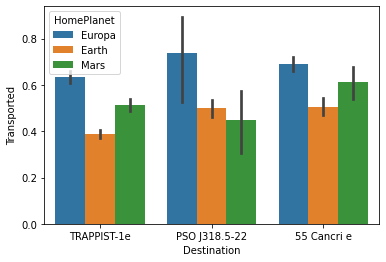

In [56]:
sns.barplot(x = "Destination", y = "Transported",hue = "HomePlanet", data=titanic);

<AxesSubplot:xlabel='Destination', ylabel='Age'>

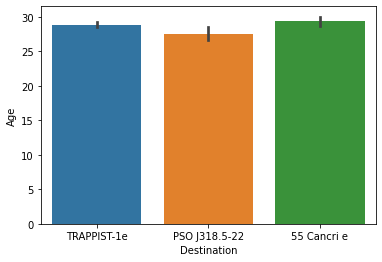

In [57]:
sns.barplot(x = "Destination", y = "Age", data = titanic)

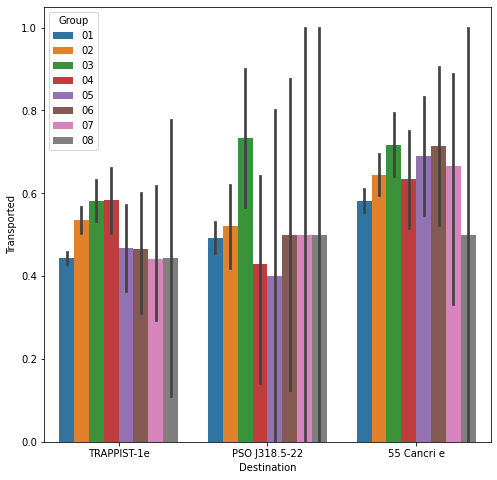

In [58]:
plt.figure(figsize= (8,8))
sns.barplot(x = "Destination", y = "Transported", hue = "Group", data = titanic);

### Spendings

<AxesSubplot:xlabel='Transported', ylabel='TotalSpending'>

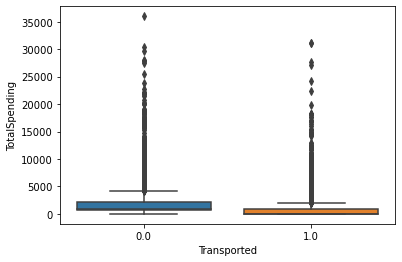

In [59]:
sns.boxplot(x = "Transported", y = "TotalSpending", data = titanic)

## Rest Missing Values

In [60]:
ed.unistats(titanic)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Young,8693,0,2,int64,0,0.177729,0,0.0,0.0,0.0,1,0.382307,1.686316,0.843857
Transported,8693,0,2,float64,1.0,0.503624,0.0,0.0,1.0,1.0,1.0,0.500016,-0.014497,-2.00025
Family,8693,0,2,float64,1.0,0.93305,0.0,1.0,1.0,1.0,1.0,0.24995,-3.46588,10.01463
VIP,8617,76,2,float64,0.0,0.023094,0.0,0.0,0.0,0.0,1.0,0.15021,6.351314,38.348091
CryoSleep,8595,98,2,float64,0.0,0.353345,0.0,0.0,0.0,1.0,1.0,0.478036,0.613715,-1.623731
ShoppingMall,8581,112,1115,float64,0.0,171.785573,0.0,0.0,0.0,24.0,23492.0,601.581625,12.690624,332.168568
RoomService,8580,113,1273,float64,0.0,222.906876,0.0,0.0,0.0,44.0,14327.0,664.36893,6.357411,65.763433
FoodCourt,8580,113,1507,float64,0.0,454.339977,0.0,0.0,0.0,70.0,29813.0,1605.430304,7.131117,73.899659
Spa,8575,118,1327,float64,0.0,308.780292,0.0,0.0,0.0,58.0,22408.0,1132.71017,7.664681,81.812471
VRDeck,8567,126,1306,float64,0.0,302.648535,0.0,0.0,0.0,44.0,24133.0,1141.855811,7.847803,86.628571


In [61]:
from sklearn.impute import KNNImputer

In [62]:
imputer = KNNImputer(n_neighbors=1)

In [63]:
imputer.fit(titanic[["RoomService","FoodCourt","ShoppingMall","CryoSleep","VIP","Transported","VRDeck","Age","Spa", "TotalSpending"]])
titanic[["RoomService","FoodCourt","ShoppingMall","CryoSleep","VIP","Transported","VRDeck","Age","Spa","TotalSpending"]] = imputer.fit_transform(titanic[["RoomService","FoodCourt","ShoppingMall","CryoSleep","VIP","Transported","VRDeck","Age","Spa","TotalSpending"]])


In [64]:
imputer.fit(test[["RoomService","FoodCourt","ShoppingMall","CryoSleep","VIP","VRDeck","Age","Spa", "TotalSpending"]])
test[["RoomService","FoodCourt","ShoppingMall","CryoSleep","VIP","VRDeck","Age","Spa","TotalSpending"]] = imputer.fit_transform(test[["RoomService","FoodCourt","ShoppingMall","CryoSleep","VIP","VRDeck","Age","Spa","TotalSpending"]])

In [65]:
ed.unistats(titanic)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Young,8693,0,2,int64,0,0.177729,0,0.0,0.0,0.0,1,0.382307,1.686316,0.843857
CryoSleep,8693,0,2,float64,0.0,0.3596,0.0,0.0,0.0,1.0,1.0,0.479911,0.585245,-1.65787
Age,8693,0,80,float64,28.0,28.736915,0.0,19.0,27.0,38.0,79.0,14.499549,0.415094,0.113916
VIP,8693,0,2,float64,0.0,0.023582,0.0,0.0,0.0,0.0,1.0,0.151752,6.280338,37.451257
RoomService,8693,0,1273,float64,0.0,227.149085,0.0,0.0,0.0,49.0,14327.0,668.267866,6.284764,64.287745
FoodCourt,8693,0,1507,float64,0.0,455.111469,0.0,0.0,0.0,76.0,29813.0,1604.281696,7.116934,73.552394
ShoppingMall,8693,0,1115,float64,0.0,173.617048,0.0,0.0,0.0,28.0,23492.0,601.04427,12.587686,329.036218
Spa,8693,0,1327,float64,0.0,309.815254,0.0,0.0,0.0,60.0,22408.0,1129.209492,7.649295,81.745907
VRDeck,8693,0,1306,float64,0.0,305.585183,0.0,0.0,0.0,45.0,24133.0,1144.916848,7.783093,85.168746
Transported,8693,0,2,float64,1.0,0.503624,0.0,0.0,1.0,1.0,1.0,0.500016,-0.014497,-2.00025


In [66]:
ed.unistats(test)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Young,4277,0,2,int64,0,0.168108,0,0.0,0.0,0.0,1,0.374006,1.775621,1.15337
CryoSleep,4277,0,2,float64,0.0,0.369418,0.0,0.0,0.0,1.0,1.0,0.482704,0.541298,-1.707795
Age,4277,0,79,float64,18.0,28.676409,0.0,19.0,26.0,37.0,79.0,14.175436,0.476607,0.216505
VIP,4277,0,2,float64,0.0,0.017302,0.0,0.0,0.0,0.0,1.0,0.130409,7.406307,52.878103
RoomService,4277,0,842,float64,0.0,219.634791,0.0,0.0,0.0,55.0,11567.0,605.167634,5.528347,52.880472
FoodCourt,4277,0,902,float64,0.0,446.42109,0.0,0.0,0.0,81.0,25273.0,1552.177063,6.980715,68.705353
ShoppingMall,4277,0,715,float64,0.0,176.255085,0.0,0.0,0.0,33.0,8292.0,556.968555,6.833576,68.651339
Spa,4277,0,833,float64,0.0,302.358663,0.0,0.0,0.0,50.0,19844.0,1107.322623,7.718046,81.454692
VRDeck,4277,0,796,float64,0.0,309.087678,0.0,0.0,0.0,34.0,22272.0,1237.645468,8.425766,94.98221
TotalSpending,4277,0,1276,float64,0.0,1447.106851,0.0,0.0,722.0,1449.0,33666.0,2866.330898,4.833188,33.333751


In [67]:
# We are done with the following columns dropping them before one-hot encoding
titanic.drop(["Num","Name","Surname"], axis = 1, inplace=True)
test.drop(["Num","Name","Surname"], axis = 1, inplace=True)

In [68]:
for col in titanic:
    if not pd.api.types.is_numeric_dtype(titanic[col]):
        titanic = titanic.join(pd.get_dummies(titanic[col], prefix = col, drop_first = True))
for col in test:
    if not pd.api.types.is_numeric_dtype(test[col]):
        test = test.join(pd.get_dummies(test[col], prefix = col, drop_first = True))

In [69]:
titanic.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck',
       'Side', 'Group', 'TotalSpending', 'Family', 'Young',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Side_S', 'Group_02', 'Group_03',
       'Group_04', 'Group_05', 'Group_06', 'Group_07', 'Group_08'],
      dtype='object')

In [70]:
imputer.fit(titanic[['HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Side_S', 'Group_02', 'Group_03',
       'Group_04', 'Group_05', 'Group_06', 'Group_07', 'Group_08']])
titanic[['HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Side_S', 'Group_02', 'Group_03',
       'Group_04', 'Group_05', 'Group_06', 'Group_07', 'Group_08']] = imputer.fit_transform(titanic[['HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Side_S', 'Group_02', 'Group_03',
       'Group_04', 'Group_05', 'Group_06', 'Group_07', 'Group_08']])


In [71]:
imputer.fit(test[['HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Side_S', 'Group_02', 'Group_03',
       'Group_04', 'Group_05', 'Group_06', 'Group_07', 'Group_08']])
test[['HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Side_S', 'Group_02', 'Group_03',
       'Group_04', 'Group_05', 'Group_06', 'Group_07', 'Group_08']] = imputer.fit_transform(test[['HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
                                                                                                   'Destination_TRAPPIST-1e', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
                                                                                                   'Deck_F', 'Deck_G', 'Deck_T', 'Side_S', 'Group_02', 'Group_03',
                                                                                                   'Group_04', 'Group_05', 'Group_06', 'Group_07', 'Group_08']])


In [72]:
ed.unistats(test)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Young,4277,0,2,int64,0,0.168108,0,0.0,0.0,0.0,1,0.374006,1.775621,1.15337
CryoSleep,4277,0,2,float64,0.0,0.369418,0.0,0.0,0.0,1.0,1.0,0.482704,0.541298,-1.707795
Age,4277,0,79,float64,18.0,28.676409,0.0,19.0,26.0,37.0,79.0,14.175436,0.476607,0.216505
VIP,4277,0,2,float64,0.0,0.017302,0.0,0.0,0.0,0.0,1.0,0.130409,7.406307,52.878103
RoomService,4277,0,842,float64,0.0,219.634791,0.0,0.0,0.0,55.0,11567.0,605.167634,5.528347,52.880472
FoodCourt,4277,0,902,float64,0.0,446.42109,0.0,0.0,0.0,81.0,25273.0,1552.177063,6.980715,68.705353
ShoppingMall,4277,0,715,float64,0.0,176.255085,0.0,0.0,0.0,33.0,8292.0,556.968555,6.833576,68.651339
Spa,4277,0,833,float64,0.0,302.358663,0.0,0.0,0.0,50.0,19844.0,1107.322623,7.718046,81.454692
VRDeck,4277,0,796,float64,0.0,309.087678,0.0,0.0,0.0,34.0,22272.0,1237.645468,8.425766,94.98221
TotalSpending,4277,0,1276,float64,0.0,1447.106851,0.0,0.0,722.0,1449.0,33666.0,2866.330898,4.833188,33.333751


In [73]:
# We now drop the HomePlanet, Group, Destination, Deck and Side column since we already one-hot coded them
titanic.drop(["HomePlanet","Destination","Deck","Side","Group"],axis=1, inplace=True)
test.drop(["HomePlanet","Destination","Deck","Side","Group"],axis = 1, inplace=True)

In [74]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   float64
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   float64
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   float64
 9   TotalSpending              8693 non-null   float64
 10  Family                     8693 non-null   float64
 11  Young                      8693 non-null   int64  
 12  HomePlanet_Europa          8693 non-null   float64
 13  HomePlanet_Mars            8693 non-null   float

Now we have 30 predictors with 1 binary response variable.

## Modelling

In [75]:
import sklearn.model_selection as skm
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import (accuracy_score, log_loss)
from sklearn.ensemble import RandomForestClassifier as RFC , GradientBoostingClassifier as GBC
import xgboost as xgb

In [76]:
X_train, X_test, y_train, y_test = skm.train_test_split(titanic.drop("Transported",axis =1 ), titanic.Transported,test_size=0.2)

In [77]:
cv = skm.ShuffleSplit()

### Desicion Trees

In [78]:
# Bagging
bag_titanic = RFC(max_features=X_train.shape[1])
bag_titanic.fit(X_train, y_train)

RandomForestClassifier(max_features=30)

In [79]:
accuracy_score(y_test,bag_titanic.predict(X_test))

0.8016101207590569

In [80]:
# Random Forest 
RF_titanic = RFC(max_features=int(np.sqrt(X_train.shape[1]))).fit(X_train,y_train)

In [81]:
accuracy_score(y_test, RF_titanic.predict(X_test))

0.8050603795284647

In [82]:
y_pred = bag_titanic.predict(test)
sub_df = pd.DataFrame(data = y_pred, columns = ["Transported"])
sub_df["PassengerId"] =  ID
sub_df = sub_df[["PassengerId","Transported"]]
sub_df.Transported = sub_df.Transported.astype(bool)
sub_df.to_csv("bagging.csv", index = False)
sub_df.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


**Kaggle Score: 0.78489**

In [83]:
boost_titanic = GBC()
boost_titanic.fit(X_train,y_train)

GradientBoostingClassifier()

In [84]:
grid = skm.GridSearchCV(boost_titanic,
                       {"learning_rate":[0.001,0.01,0.1,1],
                       "n_estimators":[10,100,100]},
                       refit=True,
                       cv = cv)
grid.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [10, 100, 100]})

In [85]:
accuracy_score(y_test, boost_titanic.predict(X_test))

0.8154111558366878

In [86]:
y_pred = boost_titanic.predict(test)
sub_df = pd.DataFrame(data = y_pred, columns = ["Transported"])
sub_df["PassengerId"] =  ID
sub_df = sub_df[["PassengerId","Transported"]]
sub_df.Transported = sub_df.Transported.astype(bool)
sub_df.to_csv("boosting4.csv", index = False)
sub_df.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


**Kaggle Score: 0.8043**

### Logistic Regression, LDA, QDA, Naive Bayes

In [87]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB

In [88]:
clf = LogisticRegressionCV().fit(X_train,y_train)

In [89]:
accuracy_score(y_test, clf.predict(X_test))

0.8004600345025877

In [90]:
y_pred = clf.predict(test)
sub_df = pd.DataFrame(data = y_pred, columns = ["Transported"])
sub_df["PassengerId"] =  ID
sub_df = sub_df[["PassengerId","Transported"]]
sub_df.Transported = sub_df.Transported.astype(bool)
sub_df.to_csv("log_red.csv", index = False)
sub_df.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


**Kaggle Score 0.7905**

In [91]:
clf = LDA()
clf.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [92]:
accuracy_score(y_test, clf.predict(X_test))

0.7837837837837838

In [93]:
clf = QDA()
clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [94]:
accuracy_score(y_test, clf.predict(X_test))

0.7222541690626797

In [95]:
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [96]:
accuracy_score(y_test, NB.predict(X_test))

0.7303047728579644

None of the scores are enough to submit.

### XGBoost

In [97]:
clf = xgb.XGBClassifier()

In [98]:
clf.fit(X_train, y_train)

[22:34:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
grid = skm.GridSearchCV(clf,
                       {"tree_method":["gpu_hist","approx","hist"]},
                       refit=True,
                       cv = cv,
                       scoring="accuracy")
grid.fit(X_train,y_train)

[22:34:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:05] WARNING:

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             param_grid={'tree_method': ['gpu_hist', 'approx', 'hist']},
             scoring='accuracy')

In [100]:
accuracy_score(y_test, grid.predict(X_test))

0.8142610695802185

In [101]:
y_pred = clf.predict(test)
sub_df = pd.DataFrame(data = y_pred, columns = ["Transported"])
sub_df["PassengerId"] =  ID
sub_df = sub_df[["PassengerId","Transported"]]
sub_df.Transported = sub_df.Transported.astype(bool)
sub_df.to_csv("xgboost.csv", index = False)
sub_df.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


**Kaggle score 0.79448**